# Simulating Steller Orbits Around Sagittarius A

Arian Andalib, Nate Gu, Elias Taira

## Introduction

While Sagittarius A (Sag A for short) has been observed many times and have been confirmed to be the center of our galaxy since as early as the 1980's, it wasn't until the 2000s that this "star" was confirmed to be a black hole. Even more recently, we have been able to observe the orbits of stars very close to the black hole. Then, using Kepler's Laws to map out the orbital path of the stars, obtain an accurate reading of what the mass of this black hole is.

![](./Galactic_centre_orbits.svg.png)

After a careful analysis of the astronomical data, it was found that the bleck hole weighs around $3.6^{+0.2}_{-0.4}*10^6 M_\odot$ 

The actual data for these orbits can be found below from the Wikepidia page on Sag A

In [1]:
import pandas as pd
sagAdat = pd.read_excel("SagittariusA_data.xlsx")
sagAdat

,id1,id2,a,Δa,e,Δe,i (°),Δi,Ω (°),ΔΩ,...,Δω,Tp (yr),ΔTp,P (yr),ΔP,Kmag,q (AU),Δq,v (%c),Δv
0,S1,S0-1,0.5950,0.0240,0.5560,0.0180,119.14,0.21,342.04,0.32,...,1.40,2001.800,0.150,166.0,5.8,14.70,2160.7,6.7,0.55,0.03
1,S2,S0-2,0.1251,0.0001,0.8843,0.0001,133.91,0.05,228.07,0.04,...,0.04,2018.379,0.001,16.1,0.0,13.95,118.4,0.2,2.56,0.00
2,S8,S0-4,0.4047,0.0014,0.8031,0.0075,74.37,0.30,315.43,0.19,...,0.41,1983.640,0.240,92.9,0.4,14.50,651.7,22.5,1.07,0.01
3,S12,S0-19,0.2987,0.0018,0.8883,0.0017,33.56,0.49,230.10,1.80,...,1.50,1995.590,0.040,58.9,0.2,15.50,272.9,2.0,1.69,0.01
4,S13,S0-20,0.2641,0.0016,0.4250,0.0023,24.70,0.48,74.50,1.70,...,2.40,2004.860,0.040,49.0,0.1,15.80,1242.0,2.4,0.69,0.01
5,S14,S0-16,0.2863,0.0036,0.9761,0.0037,100.59,0.87,226.38,0.64,...,0.87,2000.120,0.060,55.3,0.5,15.70,56.0,3.8,3.83,0.06
6,S62,NaN,0.0905,0.0001,0.9760,0.0020,72.76,4.58,122.61,0.57,...,0.40,2003.330,0.010,9.9,0.0,16.10,16.4,1.5,7.03,0.04
7,S4714,NaN,0.1020,0.0120,0.9850,0.0110,127.70,0.28,129.28,0.63,...,0.08,2017.290,0.020,12.0,0.3,17.70,12.6,9.3,8.00,3.00


In this experiment, we seek to understand nderlying physics behind this orbital motion. Thus we decided to try to reconstruct this system with these same orbital patterns using nothing but the gravitational forces between the orbiting stars and central black hole, as well as the initial positions and velocities of the stars as well.

To do this, we will employ the use of the **Velocity Verlet method**, an iterative method designed to solve various kinds of differential equations. In the scope of this project we will use it to solve for the positions and velocities of the nearby stars orbiting Sag A given their initial position, velocity and the gravitational force exerted on them by the central black hole all as a function of time.

The differential equation we will be solving is denoted by: $$a(r) = \frac{GM_sr}{\textbf{r}^3} $$ where $a(r)$ represents the acceleration of the star (derived from the gravitational force), $G$ represents the gravitational constant ($6.67*10^{-11} m^3 kg^{-1} s^{-2}$), $M_s$ represents the mass of Sag A, **r** represents the distance to Sag A in meters and, r represents the position vector of the star.

To obtain these initial conditions, we decided to use the **q (AU)** column for position and the  **v(%c)** column for velocity. **q (AU)** represents the distance of the star from the black hole at its **perhilion**, the closest point to the black hole in the star's orbital path. This distance is measured in **AU** or **Astronomical Units**, which represent the distance from Earth to the Sun (i.e., the distance from Earth to the Sun is 1 AU or ~1.5e11 m). However, for this project we will be working in SI units, so this will be converted into meters. **v(%c)** represents the speed of the star at this perhilion location. This is units of **%c** where 'c' represents the speed of light at $3*10^8$ m/s. We will also be using this in SI units as well (m/s).

## Methodology / Results

### 2D Orbit Simulation

In the process of making an accurate model for the Sag A system, we decided that it would be best to first start out with a simpler model of our system in a lower dimension to ensure that the basics of our model are functioning as they should before we add any more complexity to our model. Therefore, we will first try to build our model in 2 dimensions.

The majority of our code will be found in the form of classes and objects located within the file 'system.py'. There we create objects for each star in the system ('star' class), as well as an object for simulating each star object as they move through their respecive orbits ('system2d' class).

To validate that our Velocity Verlet method is functioning as it should, we first made a simple simulation of a black hole and star system with similar masses to that of our own Sun and Earth respectively.

To do this, we must first import the libraries we will be using: Numpy and Matplotlib. While we will import more libraries in order to run some animations and make 3-D plots, those libraries will be imported in 'system.py'. Only having numpy in the notebook will be sufficient enough to initialize our data. Additionally we will also import our classes from 'system.py'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
from system import star, system2d

Now we are able to run our basic simulation.

In [3]:
black_hole_mass = 2e30 # in kilograms (kg)

r0 = [1.5e11,0] # in units of meters(m), represents the initial position in [x,y]
v0 = [0,2.98e4] # in units of meters per second (m/s), represents the initial velocity in [v_x,v_y]

test_star = star(r0,v0) # creates a star object with an initial velocity and position

test_list = [test_star] # system2d class takes in a list of star objects as an argument

test_system = system2d(test_list,black_hole_mass) # creates a 2d system object using the 
                                                  # star list and the mass of the central black hole
tf = 365*24*3600 # iterating for 1 year in units of seconds (s)
dt =  tf/1000 # Amount of time between iterations, set such that there ar 1000 iterations
test_system.iterate(tf,dt) # running the iterate method, positions and velocities are sotred within each star object


Data Instantiation Finished


We then make a plot of the position of the star over this timespan to evaluate the accuracy of our model

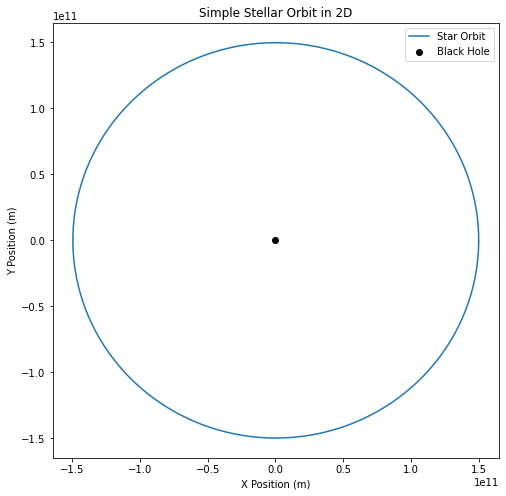

In [4]:
# making a plot of our simple orbit

plt.figure(figsize = (8,8))
plt.plot(test_star.r[:,0],test_star.r[:,1], label = "Star Orbit")
plt.scatter(0,0, color = "black", marker = "o", label = "Black Hole")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Simple Stellar Orbit in 2D")
plt.legend()

To make these orbits easier to visualize, we also added an animation method to our system classes to view the star as it is orbiting.

KeyboardInterrupt: 

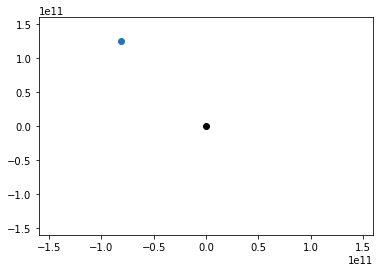

In [5]:
# I made some changes to this part that would be nce to see in the 3d plot, but it seems as thought 
# I'm having some troube with my indexing

# If you could get this part working Nate, that would be pretty awsome

xlim = 1.6e11
ylim = 1.6e11

test_system.plot(xlim, ylim, tf, dt)

Now that our test case has proven valid we can now move on to using data from the Sag A system to create our model in 2 dimensions.

We begin by first converting the initial conditions we will be using into SI units.

In [6]:
sagAdat["q(m)"] = sagAdat["q (AU)"]*1.496e11 # converting our perhilion column to meters
sagAdat["v(m/s)"] = sagAdat["v (%c)"]*0.01*3e8 # converting our perhilion speed column to meters per second

We will now be able to create our star objects and put them into a list

In [7]:
st_list = [] # empty list of stars with set initial positions and velocities
for i in range(len(sagAdat["q(m)"])-3):
    st_list.append(star([sagAdat["q(m)"][i],0],[0,sagAdat["v(m/s)"][i]])) # creating star objects 
                                                                       # and adding them to the list

Now, creating our system and iterating to obtain positions and velocities of the Sag A stars as they orbit around the black hole:

In [8]:
M = 2e30*4e6 # mass of Sag A
tf = 365*24*3600*400 # running for 400 years (in seconds)
dt = 365*24*3600/100 # Iterating 100 times per year

SagASystem2d = system2d(st_list,M) # creating system object

SagASystem2d.iterate(tf,dt) # iterating over tf, values stored in star objects

Data Instantiation Finished
Data Instantiation Finished
Data Instantiation Finished
Data Instantiation Finished
Data Instantiation Finished


Now, plotting out the orbital paths and orbit animations:

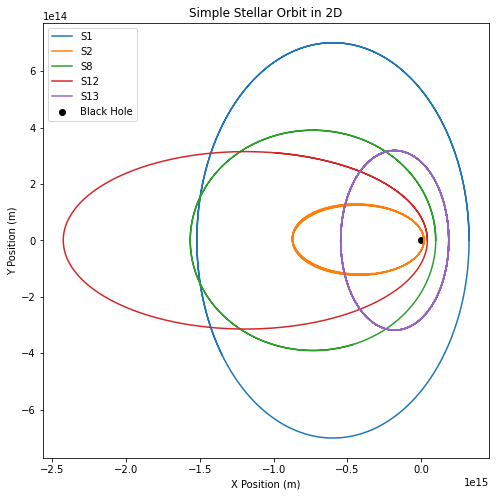

In [9]:
plt.figure(figsize = (8,8))
for i in range(len(st_list)):
    plt.plot(st_list[i].r[:,0],st_list[i].r[:,1], label = str(sagAdat["id1"][i]))
plt.scatter(0,0, color = "black", marker = "o", label = "Black Hole")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Simple Stellar Orbit in 2D")
plt.legend()

KeyboardInterrupt: 

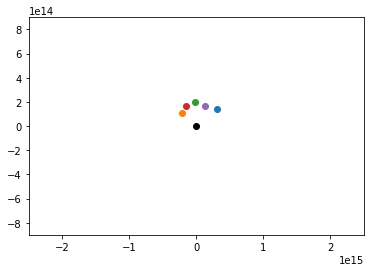

In [10]:
xlim = 2.5e15
ylim = 9e14
SagASystem2d.plot(xlim,ylim,tf,dt)

### 3D Orbit Simulation

For the simulation of these orbits in the three-dimensional plane, there were quite a few things that needed to be changed. First and foremost, we changed how the iterate function would create the vectors for velocity and position. We added an additional column that would store the Z direction of velocity and the Z posiiton that the star is located. This allows us to have 3D aspects of the start to animate and update. The second thing we had to change was the plot function. This is due to the fact that the one written before was for a two-dimensional space. Adding 3D plotting and animation functionality was actually not that difficult. We found and used the projection 3D argument in the matplotlib axes instantiation function. Then, we used a loop that would plot the star's 3D position at a certain point in time, then set the axes of the plot. After this, the plot was displayed and the kernel is slept for a certain amount of time. The plots axes are then cleared and the output from the cell is cleared so that the next iteration of the function can run and redraw a plot, in a way that simulates and acts like an animation. 

Here is a demo of the 3D animation using test data that has no physical meaning. 

First we will need to import matplotlib to plot our animation and orbits, numpy for mathematical functions such as sin, cos, and the constant pi, and lastly system3D and start from the system file, which are the two classes we need to run our animations.

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from system import system3d, star

These are proxy starts that will be a part of our orbit. Currently, they are assigned values that have them travel in a line, just to test that the 3D animation works. 

In [29]:
# creating the star objects

st1 = star([1.0,0,0],[0.0,2*np.pi,1])

st2 = star([2.0,0.0,0],[0.0,2*np.pi,1])

st3 = star([0.5,0.0,0],[0.0,2*np.pi,1])

st4 = star([3.0,0.0,0],[0.0,2*np.pi,1])

st_list = [st1,st2,st3,st4]

This block of code will calculate 100 iterations, with spacings of 0.001 between the iterations. The M represents the mass of the central body, but I just picked a random value to test the animation. The iterate function called in this vlock of code will fill in the position and velocity vectors that will be plotted to model the movement of the stars.

In [30]:
tf = 100
dt = 0.001
M = 100

test_system = system3d(st_list, M)

test_system.iterate(tf,dt)

Data Instantiation Finished


This plot is a 3D plot of the whole path taken by the test stars. Like I said before, they are going in straight lines parallel to each other

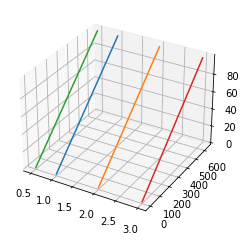

In [31]:
ax = plt.axes(projection='3d')
for i in range(len(st_list)):
    ax.plot(st_list[i].r[:,0],st_list[i].r[:,1],st_list[i].r[:,2])

This line of code will run the animation. The animation runs in a small zoomed in area of the plot, since allowing the axis limits to be what is apparent on the graph above will cause for almost no change in the position of the stars. 

In [ ]:
# plotting the 3D model
test_system.plot([-5,5],[-5,5],[-5,5], tf, dt)

Now onto the 3D animation of the Sag A data. 

This block is converting some of the units in the data frame and making the data usable for our 3D model.

In [36]:
# puting the data in a more usable form
sagAdat["q(m)"] = sagAdat["q (AU)"]*1.496e11 # Converting from 'AU' to 'm'
sagAdat["z"] = sagAdat["q(m)"]*np.sin(sagAdat["i (°)"]*np.pi/180) # Finding 'z' position at perihelion 
                                                                  # in cartesian coords
sagAdat["x"] = sagAdat["q(m)"]*np.cos(sagAdat["i (°)"]*np.pi/180)
sagAdat["v(m/s)"] = sagAdat["v (%c)"]*0.01*3e8 # converting star speed to m/s

Add the stars to an intermediate list so that it can be set to the list that is a data member of the 3D system. 

In [37]:
# Initializing a list of star objects using the information from the dataset 
# Excluding last 3 stars due to their relativistic motion

st_list = []
for i in range(len(sagAdat["q(m)"])-3):
    st_list.append(star([sagAdat["x"][i],0,sagAdat["z"][i]],[0,sagAdat["v(m/s)"][i],0]))

Defining the mass of Sag A and the amount of iterations we want. We wthen run the iterate function on the 3D system that we create. This fills the position and veclocity vectors with 3 columns of data, x, y, and z, for both the position and velocity.

In [38]:
M = 2e30*4e6 # mass of Sag A
tf = 365*24*3600*400 # running for 400 years (in seconds)
dt = 365*24*3600/100 # Iterating 100 times per year

system_3D = system3d(st_list,M)

system_3D.iterate(tf,dt)

Data Instantiation Finished


Showing the 3D orbit path that the stars are going to take:

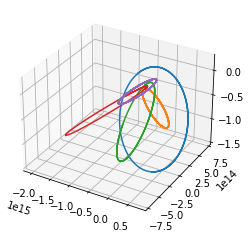

In [44]:
ax = plt.axes(projection='3d')
for i in range(len(st_list)):
    ax.plot(st_list[i].r[:,0],st_list[i].r[:,1],st_list[i].r[:,2])

The 3D animation:

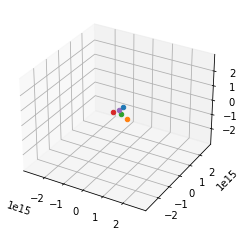

KeyboardInterrupt: 

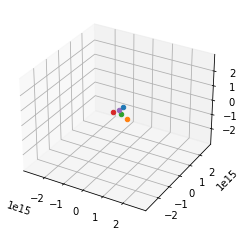

In [46]:
tbnd = 2 * 1.496e15 # making plot boundaries

system_3D.plot([-tbnd,tbnd],[-tbnd,tbnd],[-tbnd,tbnd], tf, dt) 

## Conclusion